## Data Explanation ##

**Stores**
* Store: The store number. Range from 1-45.
* Type: Three types of stores ‘A’, ‘B’ or ‘C’.
* Size: Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.

**Features**
* Store: The store which observation in recorded 1-45.
* Date: The date of the week where this observation was taken. 
* Temperature: Temperature of the region during that week.
* Fuel_Price: Fuel Price in that region during that week.
* MarkDown1:5 : Represents the Type of markdown and what quantity was available during that week.
* CPI: Consumer Price Index during that week.
* Unemployment: The unemployment rate during that week in the region of the store.
* IsHoliday: Boolean value representing a holiday week or not.

**Sales**
* Store: The store which observation in recorded 1-45.
* Dept: One of 1-99 that shows the department.
* Date: The date of the week where this observation was taken. 
* Weekly_Sales: The sales recorded during that Week.
* IsHoliday: Boolean value representing a holiday week or not.

# Data Exploration

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
# reading the data
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')
features = pd.read_csv('Features data set.csv')

In [3]:
# creating the dataframe + merging the features
df = pd.merge(sales, stores, on='Store', how='left')
df = pd.merge(df, features, on=['Store', 'Date'], how='left')
df = df.drop(['IsHoliday_y'], axis=1)
df = df.rename(columns={'IsHoliday_x':'IsHoliday'})
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
# data inspection
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


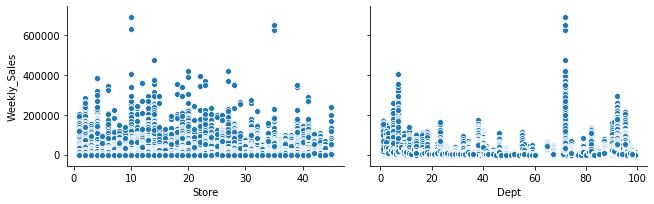

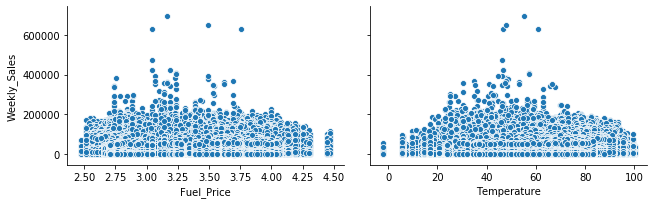

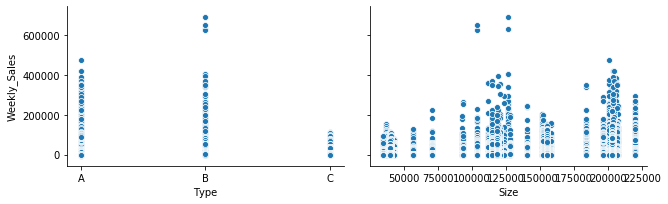

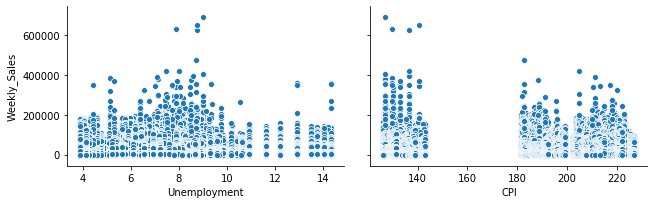

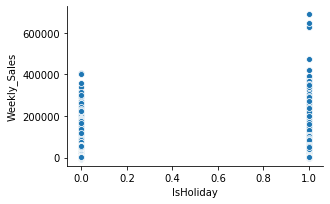

In [5]:
# visualization-weekly sales vs features
sns.pairplot(df ,height=3, aspect=1.5, y_vars=['Weekly_Sales'], 
             x_vars=['Store', 'Dept'])
sns.pairplot(df ,height=3, aspect=1.5, y_vars=['Weekly_Sales'], 
             x_vars=['Fuel_Price', 'Temperature'])
sns.pairplot(df ,height=3, aspect=1.5, y_vars=['Weekly_Sales'], 
             x_vars=['Type', 'Size'])
sns.pairplot(df ,height=3, aspect=1.5, y_vars=['Weekly_Sales'], 
             x_vars=['Unemployment', 'CPI'])
sns.pairplot(df ,height=3, aspect=1.5, y_vars=['Weekly_Sales'], 
             x_vars=['IsHoliday'])

- A particular department makes noticeably higher sales.

- Observing the small variations in the left figure, Fuel_Price does not seem to be affecting
Weekly_Sales. 
However, a number of high Weekly_Sales are associated with fuel prices ranging
from 2.75 - 3.75. This is not enough to make an assumption about the effects of fuel price, as this
increase in sales might have been due to other factors at the time.
- There appears to be a positive correlation between Weekly_Sales and Size
Sales are at their highest when Unemployment is between 7 - 9%.
- A general negative correlation is observed in Weekly_Sales and CPI, which would make sense
considering the higher the prices are, the less the customers could afford to purchase goods.
- Sales are generally higher on holidays but not as much as expected (450k compared to 400k).
However, there were a few holidays that exceeded the average sales (600k to 700k).


# Data Engineering

In [6]:
# 1.weekly sales
df['Weekly_Sales'] = df['Weekly_Sales'].astype(float)
df = df[df['Weekly_Sales']>=0]
df['Weekly_Sales_log'] = np.log1p(df.Weekly_Sales)

# 2.temperature converting F to C
df['Temperature'] = (df['Temperature'] - 32) * (5/9) # (F to C)

# 3.size
df['Size_log'] = np.log1p(df.Size)
df.drop(['Size'], axis=1, inplace=True)

# 4.time-related features
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')
df['week'] = df.Date.dt.week
df['year'] = df.Date.dt.year
df1 = df.copy()
df.drop(['Date'], axis=1, inplace=True)
df['year_week'] =  df['year'].astype(str) + df['week'].astype(str)
df['year_week'] =  df['year_week'].astype(int)
df.loc[df['week']<10, 'year_week'] = df.loc[df['week']<10, 'year'].astype(str) + '0' + df.loc[
    df['week']<10, 'week'].astype(str)
df['year_week'] =  df['year_week'].astype(int)

# data cleaning
df = df.fillna(0)
df['Type'] = df['Type'].factorize()[0]
df.drop(['MarkDown1'], axis=1, inplace=True)
df.drop(['MarkDown2'], axis=1, inplace=True)
df.drop(['MarkDown3'], axis=1, inplace=True)
df.drop(['MarkDown4'], axis=1, inplace=True)
df.drop(['MarkDown5'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)
df

C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Store,Dept,Weekly_Sales,IsHoliday,Type,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Size_log,week,year_week
0,1,1,24924.50,False,0,5.727778,2.572,211.096358,8.106,10.123647,11.927126,5,201005
1,1,1,46039.49,True,0,3.616667,2.548,211.242170,8.106,10.737277,11.927126,6,201006
2,1,1,41595.55,False,0,4.405556,2.514,211.289143,8.106,10.635773,11.927126,7,201007
3,1,1,19403.54,False,0,8.127778,2.561,211.319643,8.106,9.873262,11.927126,8,201008
4,1,1,21827.90,False,0,8.055556,2.625,211.350143,8.106,9.990990,11.927126,9,201009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,1,18.266667,3.997,192.013558,8.684,6.233175,11.680319,39,201239
421566,45,98,628.10,False,1,18.272222,3.985,192.170412,8.667,6.444290,11.680319,40,201240
421567,45,98,1061.02,False,1,12.483333,4.000,192.327265,8.667,6.967928,11.680319,41,201241
421568,45,98,760.01,False,1,13.594444,3.969,192.330854,8.667,6.634646,11.680319,42,201242


In [7]:
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.014014e+08
3,4,2.995453e+08
13,14,2.890019e+08


### Store 20 is has highest weekly sales

In [8]:
# Store 20
df20 = df.where(df['Store']==20)
df20.dropna(inplace=True)
df20_1 = df20.groupby(by=['year_week'], as_index=False)['Weekly_Sales'].sum()
df20_1['Weekly_Sales_log'] = np.log1p(df20_1.Weekly_Sales)
df20_1

,year_week,Weekly_Sales,Weekly_Sales_log
0,201005.0,2401395.47,14.691561
1,201006.0,2109107.90,14.561776
2,201007.0,2161549.76,14.586336
3,201008.0,1898193.95,14.456414
4,201009.0,2119213.72,14.566556
...,...,...,...
138,201239.0,2008388.36,14.512844
139,201240.0,2246411.89,14.624845
140,201241.0,2162996.18,14.587005
141,201242.0,1999363.49,14.508340


In [9]:
# Store 20 
df20_2 = features.where(features['Store']==20)
df20_2.drop(['MarkDown1'], axis=1, inplace=True)
df20_2.drop(['MarkDown2'], axis=1, inplace=True)
df20_2.drop(['MarkDown3'], axis=1, inplace=True)
df20_2.drop(['MarkDown4'], axis=1, inplace=True)
df20_2.drop(['MarkDown5'], axis=1, inplace=True)

df20_2.drop(['Store'], axis=1, inplace=True)
df20_2.dropna(inplace=True)
df20_2['Temperature'] = (df20_2['Temperature'] - 32) * (5/9)

df20_2.Date = pd.to_datetime(df20_2.Date, format='%d/%m/%Y')
df20_2['week'] = df20_2.Date.dt.week
df20_2['year'] = df20_2.Date.dt.year
df20_2.drop(['Date'], axis=1, inplace=True)
df20_2['year_week'] =  df20_2['year'].astype(str) + df20_2['week'].astype(str)
df20_2['year_week'] =  df20_2['year_week'].astype(int)
df20_2.loc[df20_2['week']<10, 'year_week'] = df20_2.loc[df20_2['week']<10, 'year'].astype(str) + '0' + df20_2.loc[df20_2['week']<10, 'week'].astype(str)
df20_2['year_week'] =  df20_2['year_week'].astype(int)

df20_2 = df20_2.reset_index()
df20_2 = df20_2.iloc[:143]
df20_2

,index,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week,year,year_week
0,3458,-3.377778,2.784,204.247194,8.187,0.0,5,2010,201005
1,3459,-5.488889,2.773,204.385747,8.187,1.0,6,2010,201006
2,3460,-3.650000,2.745,204.432100,8.187,0.0,7,2010,201007
3,3461,0.177778,2.754,204.463087,8.187,0.0,8,2010,201008
4,3462,-0.138889,2.777,204.494073,8.187,0.0,9,2010,201009
...,...,...,...,...,...,...,...,...,...
138,3596,14.805556,3.997,215.736716,7.280,0.0,39,2012,201239
139,3597,15.983333,3.985,215.925887,7.293,0.0,40,2012,201240
140,3598,8.444444,4.000,216.115057,7.293,0.0,41,2012,201241
141,3599,13.477778,3.969,216.146470,7.293,0.0,42,2012,201242


converting sals by Yearly and weekly 

In [10]:
# Store 20
df20_3 = pd.merge(df20_1, df20_2)
df20_3['year_week'] = df20_3['year_week'].astype(int)
df20_3.drop(['index'], axis=1, inplace=True)
df20_3.drop(['year'], axis=1, inplace=True)
df20_3

,year_week,Weekly_Sales,Weekly_Sales_log,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,week
0,201005,2401395.47,14.691561,-3.377778,2.784,204.247194,8.187,0.0,5
1,201006,2109107.90,14.561776,-5.488889,2.773,204.385747,8.187,1.0,6
2,201007,2161549.76,14.586336,-3.650000,2.745,204.432100,8.187,0.0,7
3,201008,1898193.95,14.456414,0.177778,2.754,204.463087,8.187,0.0,8
4,201009,2119213.72,14.566556,-0.138889,2.777,204.494073,8.187,0.0,9
...,...,...,...,...,...,...,...,...,...
138,201239,2008388.36,14.512844,14.805556,3.997,215.736716,7.280,0.0,39
139,201240,2246411.89,14.624845,15.983333,3.985,215.925887,7.293,0.0,40
140,201241,2162996.18,14.587005,8.444444,4.000,216.115057,7.293,0.0,41
141,201242,1999363.49,14.508340,13.477778,3.969,216.146470,7.293,0.0,42


In [11]:
dffinal=df.copy()
df_20 = df20_3

Function for performing models

In [12]:
# functions
def data_split(d, t):
    test = d[d.year_week.isin(t)]
    train = d[~d.year_week.isin(t)]
    test.drop(['Weekly_Sales'], axis=1, inplace=True)
    train.drop(['Weekly_Sales'], axis=1, inplace=True)
    X_test = test.drop('Weekly_Sales_log', axis=1)
    y_test = test['Weekly_Sales_log']
    X_train = train.drop('Weekly_Sales_log', axis=1)
    y_train = train['Weekly_Sales_log']
    return X_test, y_test, X_train, y_train

def vis(y_test, y_pred, X_test):
    y = pd.DataFrame(X_test[:], columns=['test', 'pred'])
    y['test'] = np.expm1(y_test)
    y['pred'] = np.expm1(y_pred)
    ax = y.plot(figsize=(10,5),title="Model's Prediction Performance")
    ax.set_xlabel('data row id')
    ax.set_ylabel('weekly sales')
    ax

def accuracy(X_test,y_test, y_pred):
    print('accuracy (R^2):\n', model.score(X_test, y_test)*100, '%')

# linear Regression model

accuracy (R^2):
 11.562099711020258 %

 coefficients:
  [-1.21495468e-02  1.85250597e-03  5.18903728e-03  5.28490602e-02
 -1.90441458e-03  2.33343359e-02 -7.61869868e-04 -1.65426579e-02
  1.11359026e+00  3.73972419e-03 -3.24703265e-04]


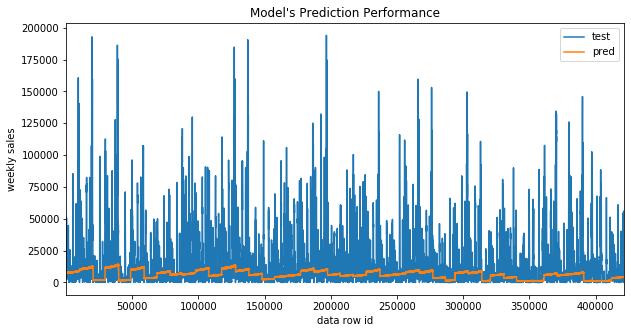

In [13]:
# linear Regression model -- all stores
X_test, y_test, X_train, y_train = data_split(df, np.linspace(201230, 201243))
model = LinearRegression(copy_X=True, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# performance
accuracy(X_test, y_test, y_pred)
vis(y_test, y_pred, X_test)
print('\n coefficients:\n ', model.coef_)

C:\Users\Akash\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


accuracy (R^2):
 11.415722867193633 %

 coefficients:
  [-1.24182109e-02  1.84323322e-03  4.78642678e-02 -7.28338008e-04
  1.11618087e+00  3.55985044e-03]


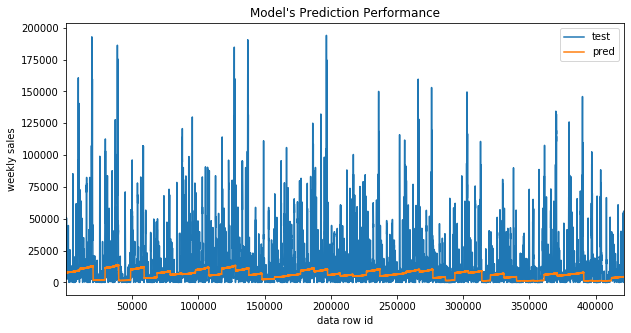

In [14]:
# linear Regression model -- all stores -- important features
df.drop(['Fuel_Price'], axis=1, inplace=True)
df.drop(['IsHoliday'], axis=1, inplace=True)
df.drop(['Temperature'], axis=1, inplace=True)
df.drop(['Unemployment'], axis=1, inplace=True)
X_test, y_test, X_train, y_train = data_split(df, np.linspace(201230, 201243))
X_train.drop(['year_week'], axis=1, inplace=True)
X_test.drop(['year_week'], axis=1, inplace=True)
model = LinearRegression(copy_X=True, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# performance
accuracy(X_test, y_test, y_pred)
vis(y_test, y_pred, X_test)
print('\n coefficients:\n ', model.coef_)

# Random Forest Regressor model

C:\Users\Akash\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 94.92370237642899 %

 out of bag score:
  0.9723275642657155

 feature importances:
  [5.54026952e-02 7.14672199e-01 5.46681347e-04 1.81884657e-02
 8.68196759e-03 6.68476880e-03 1.64291642e-02 1.00733073e-02
 1.29116161e-01 2.82733704e-02 1.19312196e-02]


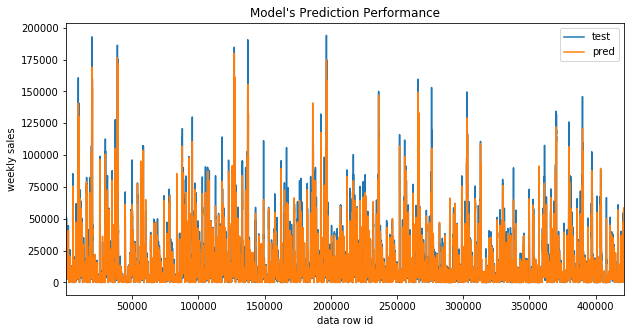

In [15]:
# Random Forest Regressor model -- all stores
X_test, y_test, X_train, y_train = data_split(dffinal, np.linspace(201230, 201243))
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

# Backward Feature Elimination
(in Random Forest Regressor model)

 Random Forest Regressor model -- all stores -- removing IsHoliday

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 94.97000684110421 %

 out of bag score:
  0.972221583320626

 feature importances:
  [0.05546312 0.71465604 0.01951429 0.00874542 0.00672397 0.01627629
 0.01007522 0.12790774 0.02849157 0.01214635]


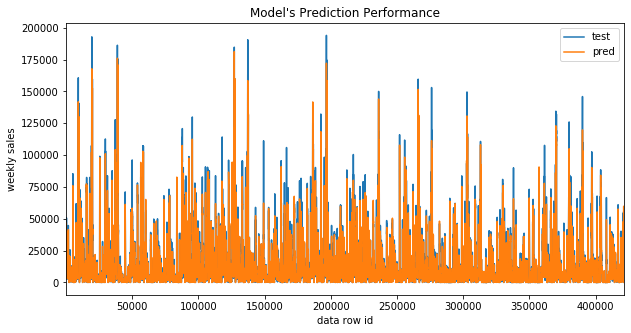

In [16]:
# Random Forest Regressor model -- all stores -- removing IsHoliday
X_test.drop(['IsHoliday'], axis=1, inplace=True)
X_train.drop(['IsHoliday'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing Fuel_Price

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 94.82690139044462 %

 out of bag score:
  0.9724104437750605

 feature importances:
  [0.05563881 0.71456626 0.01687816 0.00985361 0.01763283 0.01039451
 0.13073764 0.02975749 0.01454069]


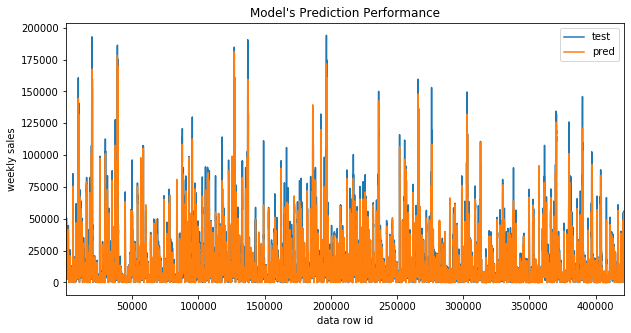

In [17]:
# Random Forest Regressor model -- all stores -- removing Fuel_Price
X_test.drop(['Fuel_Price'], axis=1, inplace=True)
X_train.drop(['Fuel_Price'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing Temperature

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 94.43180531359154 %

 out of bag score:
  0.9730562333739169

 feature importances:
  [0.05647453 0.71468038 0.01689057 0.01989913 0.01109293 0.13086895
 0.03368915 0.01640436]


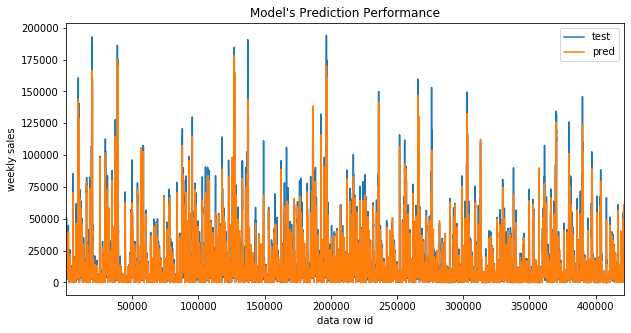

In [18]:
# Random Forest Regressor model -- all stores -- removing Temperature
X_test.drop(['Temperature'], axis=1, inplace=True)
X_train.drop(['Temperature'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing Unemployment

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 94.45416174038986 %

 out of bag score:
  0.9730265408634516

 feature importances:
  [0.05958386 0.71497524 0.01557536 0.02233277 0.13606599 0.0340715
 0.01739528]


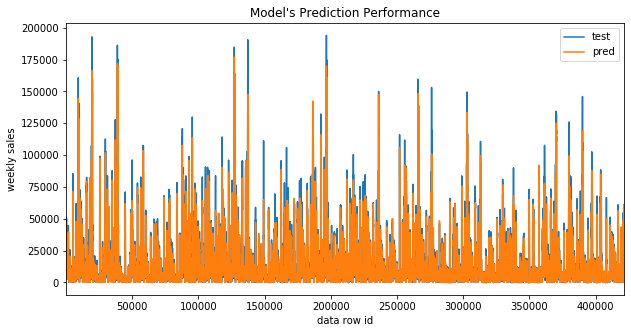

In [19]:
# Random Forest Regressor model -- all stores -- removing Unemployment
X_test.drop(['Unemployment'], axis=1, inplace=True)
X_train.drop(['Unemployment'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing year_week

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 95.33139993180137 %

 out of bag score:
  0.9708588549093699

 feature importances:
  [0.0591066  0.7146384  0.01939511 0.03437551 0.13293384 0.03955054]


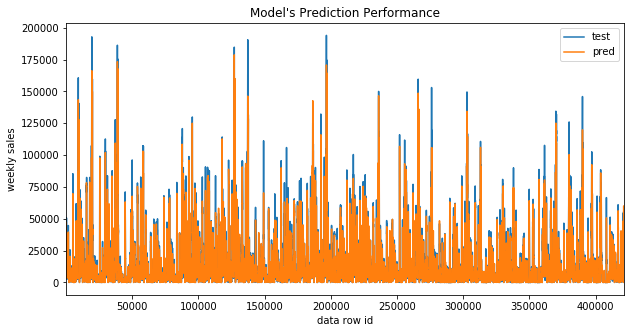

In [20]:
# Random Forest Regressor model -- all stores -- removing year_week
X_test.drop(['year_week'], axis=1, inplace=True)
X_train.drop(['year_week'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing CPI

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 93.31183608993118 %

 out of bag score:
  0.9402333764033772

 feature importances:
  [0.0661572  0.72461052 0.01696637 0.14336713 0.04889878]


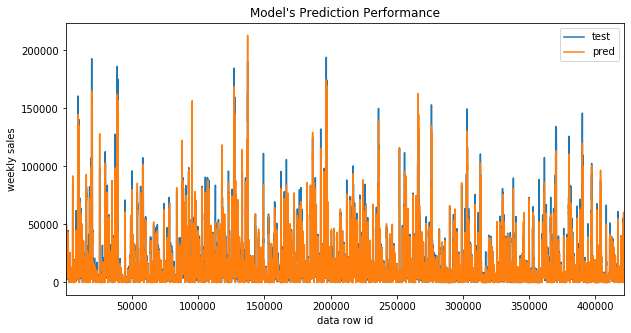

In [21]:
# Random Forest Regressor model -- all stores -- removing CPI
X_test.drop(['CPI'], axis=1, inplace=True)
X_train.drop(['CPI'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing Type

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 93.30984831864727 %

 out of bag score:
  0.9402033982857031

 feature importances:
  [0.06927491 0.7244953  0.15732027 0.04890953]


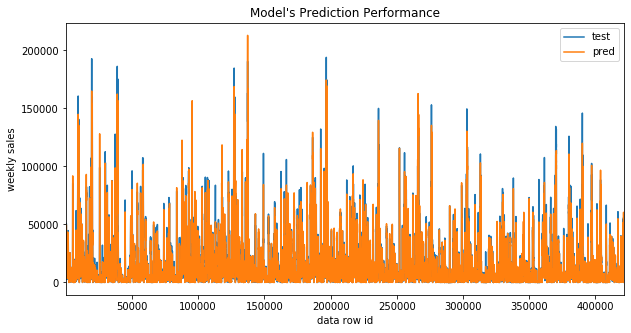

In [22]:
# Random Forest Regressor model -- all stores -- removing Type
X_test.drop(['Type'], axis=1, inplace=True)
X_train.drop(['Type'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing week

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 92.01029106146737 %

 out of bag score:
  0.9158840842449926

 feature importances:
  [0.07102406 0.76506543 0.16391051]


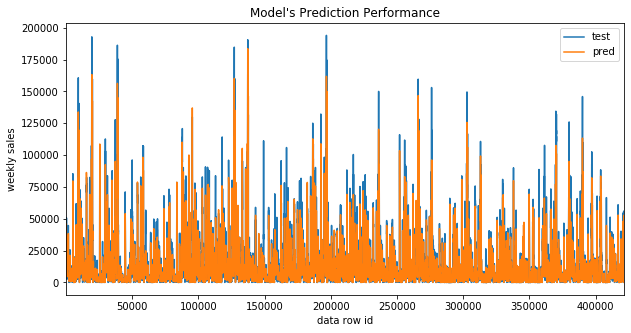

In [23]:
# Random Forest Regressor model -- all stores -- removing week
X_test.drop(['week'], axis=1, inplace=True)
X_train.drop(['week'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing Store

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 91.53893538444908 %

 out of bag score:
  0.9097467004084632

 feature importances:
  [0.77017082 0.22982918]


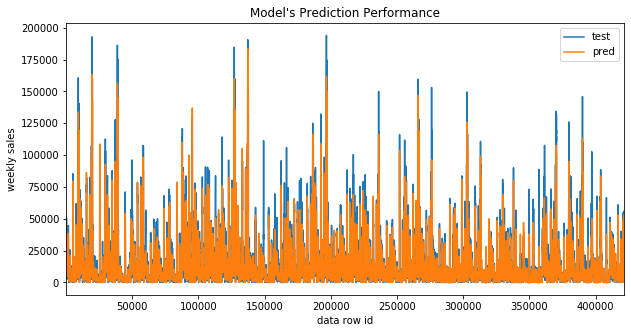

In [24]:
# Random Forest Regressor model -- all stores -- removing Store
X_test.drop(['Store'], axis=1, inplace=True)
X_train.drop(['Store'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- all stores -- removing Size_log

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


accuracy (R^2):
 49.99282056569344 %

 out of bag score:
  0.5043368524705789

 feature importances:
  [1.]


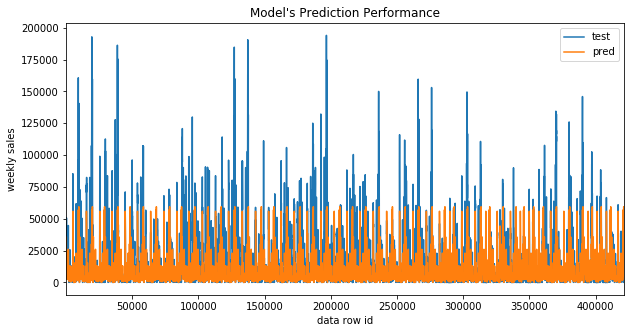

In [25]:
# Random Forest Regressor model -- all stores -- removing Size_log
X_test.drop(['Size_log'], axis=1, inplace=True)
X_train.drop(['Size_log'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Random Forest Regressor model -- store 20

C:\Users\Akash\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


accuracy (R^2):
 6.086666934480245 %

 out of bag score:
  0.1282245769983491

 feature importances:
  [0.05741817 0.08449749 0.06911821 0.07477562 0.00882351 0.01236901
 0.69299799]


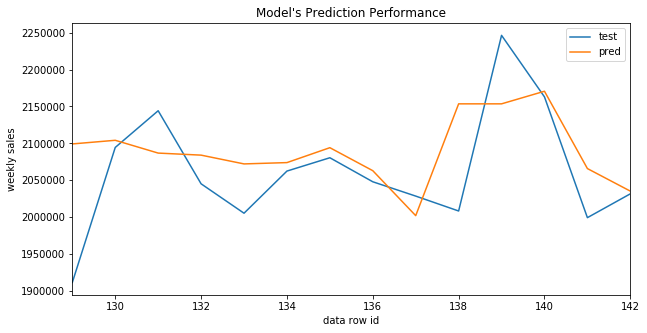

In [26]:
# Random Forest Regressor model -- store 20
X_test, y_test, X_train, y_train = data_split(df_20, np.linspace(201230, 201243))
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# performance
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)